In [1]:
from SALib import ProblemSpec
from SALib.test_functions import Ishigami
import numpy as np

import matplotlib.pyplot as plt

### Notes
`sp`: ProblemSpec object

`sp.sample_[name of method]` \
`sp.sample(my_sampler, *args, **kwargs)` \
`sp.analyze_[name of method]`

### To evalute models: 
https://salib.readthedocs.io/en/latest/user_guide/basics_with_interface.html#running-a-model 

`sp.evaluate(my_model)`\
`my_model` should accept numpy array as input in first position

OR 

```
Y = np.zeros([param_values.shape[0]])

for i, X in enumerate(param_values):
    Y[i] = evaluate_model(X)

# Provide the results to the interface
sp.set_results(Y)
```

# Sobol Indices

* S1: variations of a single input alone
* ST: variations of joint inputs (inputs interacting with each other)
* Greater $S_i$ means  “uncertainty in the input variable $i$ has a larger effect on the variance of the output” 

* larger scale/inputs means FINISHHH

Graph indicates: ? 
* X2 has the most individual impact on uncertainty 
* X1 has the most impact on uncertainty considering itself and combined with other input factors

Samples:
	3 parameters: ['x1', 'x2', 'x3']
	8192 samples
Outputs:
	1 outputs: ['Y']
	8192 evaluations
Analysis:
          ST   ST_conf
x1  0.555160  0.088312
x2  0.438627  0.034458
x3  0.242852  0.025191
          S1   S1_conf
x1  0.307723  0.053808
x2  0.439544  0.051399
x3 -0.025011  0.063791
                S2   S2_conf
(x1, x2) -0.006123  0.080195
(x1, x3)  0.264745  0.105871
(x2, x3) -0.000239  0.059324



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


<Axes: title={'center': 'Y'}>

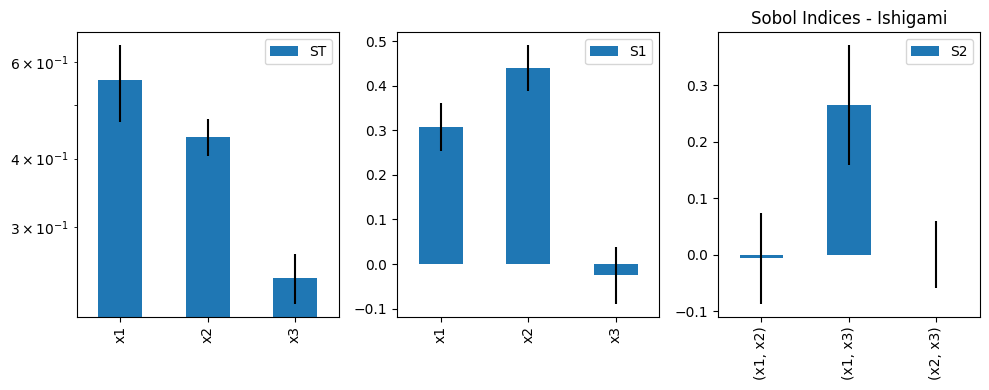

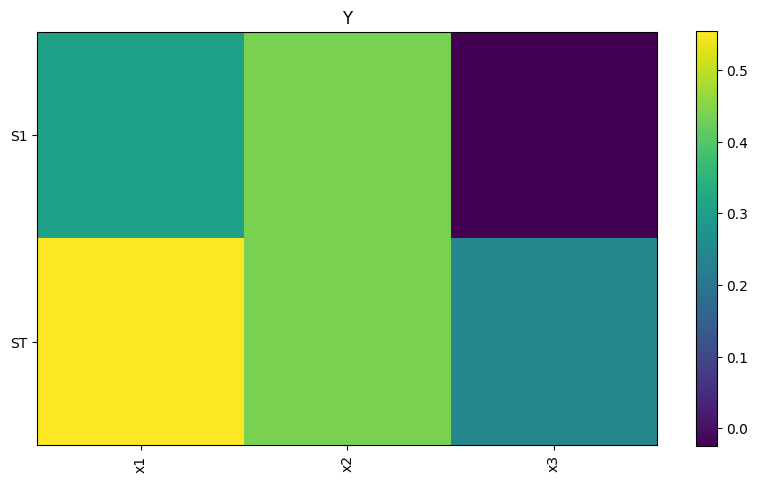

In [37]:
# ==== Sobol Indices ~ Ishigami ===

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

# generate sample, evaluate mode, find sobol indices 
(sp.sample_sobol(1024).evaluate(Ishigami.evaluate).analyze_sobol())

# information from .analyze stored in sp, data handled as numpy array
X = sp.samples
y = sp.results
S = sp.analysis

print(sp)

total_Si, first_Si, second_Si = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
axes[0].set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="Sobol Indices - Ishigami")
plt.tight_layout() 

sp.heatmap()

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	8 parameters: ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
	10240 samples
Outputs:
	1 outputs: ['Y']
	10240 evaluations
Analysis:
          ST   ST_conf
x1  0.786669  0.062856
x2  0.241680  0.027856
x3  0.034123  0.004502
x4  0.010648  0.001379
x5  0.000104  0.000014
x6  0.000105  0.000012
x7  0.000101  0.000011
x8  0.000102  0.000015
          S1   S1_conf
x1  0.716065  0.074065
x2  0.177393  0.044575
x3  0.022086  0.015918
x4  0.007573  0.008984
x5  0.000204  0.000876
x6  0.000137  0.000804
x7  0.000280  0.000891
x8 -0.000320  0.000873



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


<Axes: title={'center': 'Y'}>

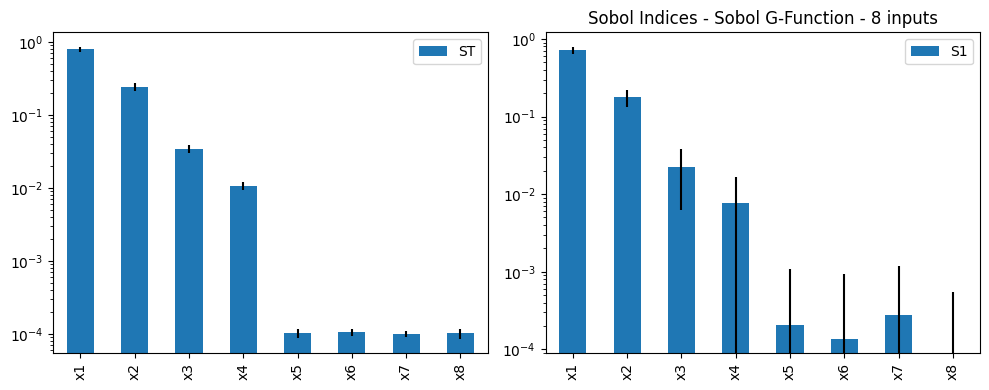

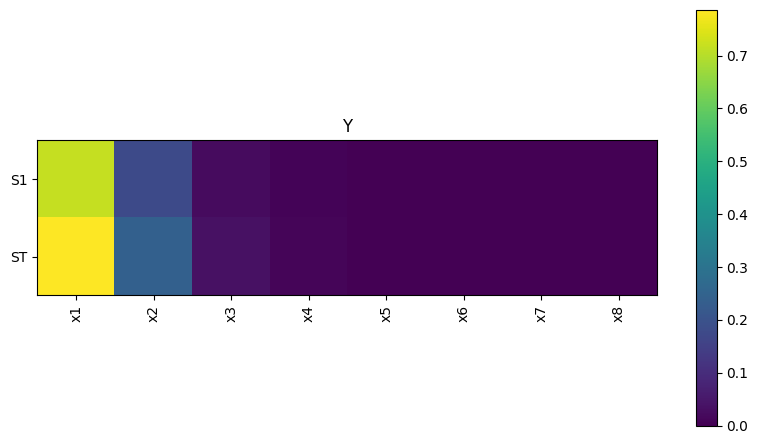

In [11]:
# ==== Sobol Indices ~ Sobol G-Function (8 inputs)===
from SALib.test_functions import Sobol_G

# define model inputs 
sp = ProblemSpec({
    'num_vars': 8,
    'names': ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8'],
    'bounds': [[0,1]] * 8
})

# generate sample, evaluate mode, find sobol indices 
(sp.sample_sobol(1024, calc_second_order=False).evaluate(Sobol_G.evaluate).analyze_sobol(calc_second_order=False))

print(sp)

total_Si, first_Si = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
axes[0].set_yscale('log') # set plot to log scale
axes[1].set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="Sobol Indices - Sobol G-Function - 8 inputs")
plt.tight_layout()

sp.heatmap()

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	43008 samples
Outputs:
	1 outputs: ['Y']
	43008 evaluations
Analysis:
           ST   ST_conf
x0   0.025483  0.003004
x1   0.025914  0.003104
x2   0.026071  0.003345
x3   0.025851  0.003313
x4   0.024829  0.002586
x5   0.025600  0.002926
x6   0.025188  0.002943
x7   0.026628  0.002903
x8   0.025752  0.003388
x9   0.025990  0.002777
x10  0.025009  0.003075
x11  0.025927  0.003533
x12  0.025158  0.003347
x13  0.026746  0.003003
x14  0.025463  0.002318
x15  0.025821  0.002951
x16  0.024903  0.003012
x17  0.025179  0.002770
x18  0.027229  0.003341
x19  0.025754  0.002765
x20  0.026364  0.002741
x21  0.025006  0.002740
x22  0.027019  0.003632
x23  0.026854  0.002997
x24  0.025919  0.002988
x25  0.02

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


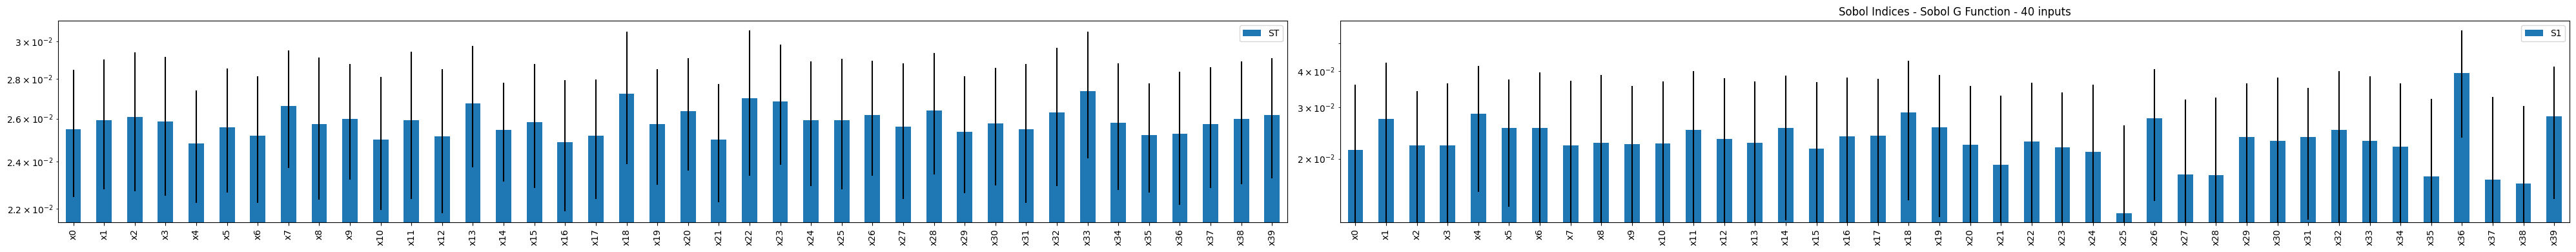

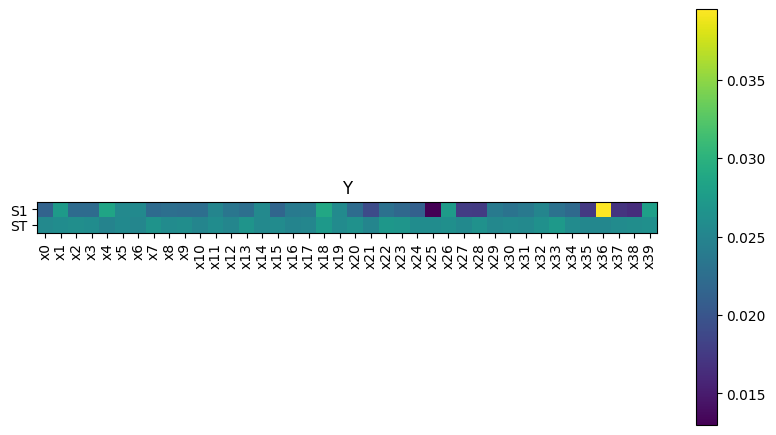

In [26]:
# ==== Sobol Indices ~ Sobol G-Function ===
from SALib.test_functions import Sobol_G

def si_sobol_g(n, a_arr=[], delta_arr=[]):
    names_arr = []
    for i in range(n):
        param = 'x' + str(i)
        names_arr.append(param)

    if len(a_arr) == 0 and len(delta_arr) == 0:
        for i in range(n):
            a_arr.append(9)
            delta_arr.append(1)

    # define model inputs 
    sp = ProblemSpec({
        'num_vars': n,
        'names': names_arr,
        'bounds': [[0,1]] * n 
    })

    # generate sample, evaluate mode, find sobol indices 
    (sp.sample_sobol(1024, calc_second_order=False).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_sobol(calc_second_order=False))

    # information from .analyze stored in sp, data handled as numpy array
    X = sp.samples
    y = sp.results
    S = sp.analysis

    print(sp)

    total_Si, first_Si = sp.to_df() # convert to pandas dataframe object

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    axes[0].set_yscale('log') # set plot to log scale
    axes[1].set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 4)
    plt.title(label=f"Sobol Indices - Sobol G Function - {n} inputs")
    plt.tight_layout()

    sp.heatmap()

si_sobol_g(40)

# Method of Morris

* $\sigma$
    * standard deviation of elementary effect
    * measures interaction between factors
    * distribution of sensitivity measures
    * Greater $\sigma$ means higher interaction with input factors

* $\mu$
    * measures overall effect of the factor on the output

* $\mu^*$
    * used to rank factors in order of importance, absolute value
    * use with few influential factors, majority non-influential factors
    * Greater $\mu^*$ means higher sensitivity???  

Graph indicates: ?
* x1 - monotonic
* x2 - linear
* x3 - linear

In [35]:
# ==== Method of Morris ~ Ishigami ===
# from SALib.analyze import morris

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

# TODO there's lots of options for sampling 
# SALib.sample.morris.morris module https://salib.readthedocs.io/en/latest/api/SALib.sample.morris.html#module-SALib.sample.morris.morris
# https://salib.readthedocs.io/en/latest/api/SALib.analyze.html#module-SALib.analyze.morris (example code that didn't work)

def morris(n : int):
    (sp.sample_morris(1000).evaluate(Ishigami.evaluate).analyze_morris())
    print(sp)

    df_morris = sp.to_df() # convert to pandas dataframe object

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    fig = plt.gcf() # get current figure
    fig.set_size_inches(5, 2)
    plt.title(label=f"Method of Morris: n={n}")
    plt.tight_layout()

    # sp.heatmap()

# morris(10)
# morris(100)
# morris(1000)

In [33]:
# ==== Method of Morris ~ Sobol G-Function ===
from SALib.test_functions import Sobol_G

def morris_sobol_g(n, a_arr=[], delta_arr=[]):
    names_arr = []
    for i in range(n):
        param = 'x' + str(i)
        names_arr.append(param)

    if len(a_arr) == 0 and len(delta_arr) == 0:
        for i in range(n):
            a_arr.append(9)
            delta_arr.append(1)

    # define model inputs 
    sp = ProblemSpec({
        'num_vars': n,
        'names': names_arr,
        'bounds': [[0,1]] * n 
    })

    # generate sample, evaluate mode, find sobol indices 
    (sp.sample_morris(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_morris())
    

    print(sp)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    axes.set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 4)
    plt.title(label=f"Method of Morris - Sobol G Function - {n} inputs")
    plt.tight_layout()

    sp.heatmap()

# morris_sobol_g(40)

# RBD-FAST

https://arxiv.org/html/2406.16975v1


*RBD-FAST vs FAST*
* FAST uses different frequencies for each parameter 
* RBD-FAST uses a single frequency
<!-- <br / -->
* The more inputs, the more costly FAST
* RBD-FAST has less computation 
<!-- <br / -->
* RBD-FAST only looks at first indice
* S1: variations of a single input alone



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


{'S1': [0.33293038415124143, 0.42103776929363423, 0.0018288239274640815], 'S1_conf': [0.06078642535637886, 0.07189330048372895, 0.04447345161615013], 'names': ['x1', 'x2', 'x3']}


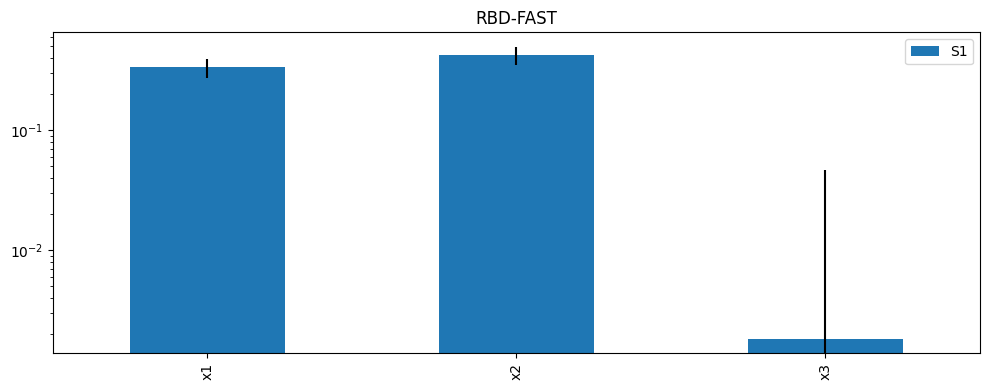

In [7]:
# ==== RBD-FAST ~ Ishigami ===
from SALib.sample import latin
from SALib.analyze import rbd_fast

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

X = latin.sample(sp, 1000)
Y = Ishigami.evaluate(X)
sp = rbd_fast.analyze(sp, X, Y, print_to_console=False)
print(sp)

df_rbd_fast = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
axes.set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="RBD-FAST")
plt.tight_layout()

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	3 parameters: ['x1', 'x2', 'x3']
	1000 samples
Outputs:
	1 outputs: ['Y']
	1000 evaluations
Analysis:
          S1   S1_conf
x1  0.321846  0.063594
x2  0.425556  0.070506
x3  0.001855  0.038214



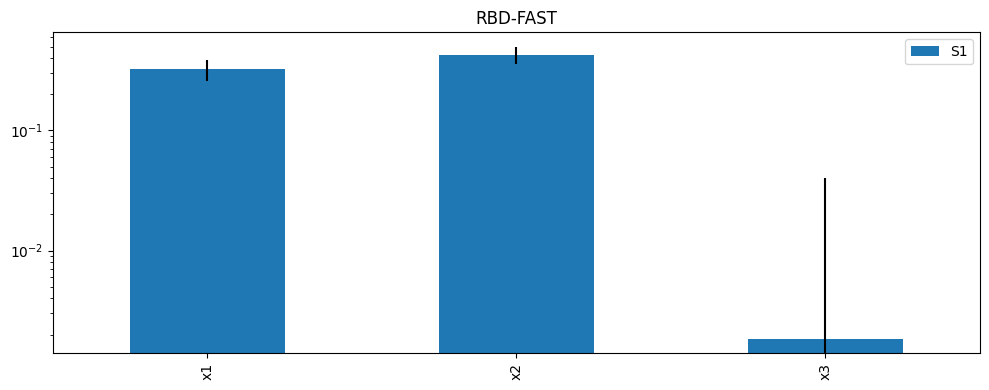

In [8]:
# ==== RBD-FAST ~ Ishigami ===
# from SALib.sample import latin
# from SALib.analyze import rbd_fast

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

# TODO ??? any sample 
(sp.sample_latin(1000).evaluate(Ishigami.evaluate).analyze_rbd_fast())
print(sp)

df_rbd_fast = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
axes.set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="RBD-FAST")
plt.tight_layout()

In [46]:
# ==== RBD-FAST ~ Sobol G-Function ===
from SALib.test_functions import Sobol_G

def rbd_fast_sobol_g(n, a_arr=[], delta_arr=[]):
    names_arr = []
    for i in range(n):
        param = 'x' + str(i)
        names_arr.append(param)

    if len(a_arr) == 0 and len(delta_arr) == 0:
        for i in range(n):
            a_arr.append(9)
            delta_arr.append(1)

    # define model inputs 
    sp = ProblemSpec({
        'num_vars': n,
        'names': names_arr,
        'bounds': [[0,1]] * n 
    })

    (sp.sample_latin(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_rbd_fast())    

    print(sp)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    axes.set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 4)
    plt.title(label=f"RBD-FAST - Sobol G Function - {n} inputs")
    plt.tight_layout()

# rbd_fast_sobol_g(40)

# FAST

(Fourier amplitude sensitivity test) \
*How it works?*
* Periodic sample search
* Uses period search function
* Applies decomposition of variance based on Fourier Transform 

*Purpose*
* Describes decomposition of variance using transfer functions 

*Attributes*
* Nonlinear, nonmonotonic models 
---
* S1: variations of a single input alone
* ST: variations of joint inputs (inputs interacting with each other)
* Greater $S_i$ means  “uncertainty in the input variable $i$ has a larger effect on the variance of the output” 

Samples:
	3 parameters: ['x1', 'x2', 'x3']
	3000 samples
Outputs:
	1 outputs: ['Y']
	3000 evaluations
Analysis:
              S1        ST   S1_conf   ST_conf
x1  3.003628e-01  0.537914  0.014625  0.035593
x2  4.421879e-01  0.469640  0.017779  0.044794
x3  2.814666e-28  0.239357  0.015737  0.041941



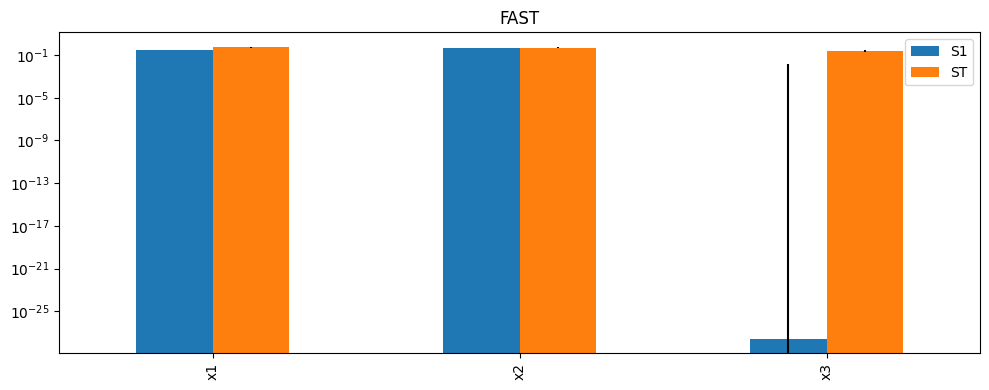

In [49]:
# ==== FAST ~ Ishigami ===
# from SALib.analyze import fast

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               
               [-3.14159265359, 3.14159265359]]
})

(sp.sample_fast(1000).evaluate(Ishigami.evaluate).analyze_fast())
print(sp)

df_fast = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
axes.set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="FAST")
plt.tight_layout()

In [57]:
# ==== FAST ~ Sobol G-Function ===
from SALib.test_functions import Sobol_G

def fast_sobol_g(n, a_arr=[], delta_arr=[]):
    names_arr = []
    for i in range(n):
        param = 'x' + str(i)
        names_arr.append(param)

    if len(a_arr) == 0 and len(delta_arr) == 0:
        for i in range(n):
            a_arr.append(9)
            delta_arr.append(1)

    # define model inputs 
    sp = ProblemSpec({
        'num_vars': n,
        'names': names_arr,
        'bounds': [[0,1]] * n 
    })

    (sp.sample_fast(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_fast())    

    print(sp)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    axes.set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 4)
    plt.title(label=f"FAST - Sobol G Function - {n} inputs")
    plt.tight_layout()

#fast_sobol_g(40)

# Delta Moment-Independent 

Moment-Independent: "assess senitivities based on the entire probability distribution"

https://arxiv.org/html/2406.16975v1 \
*How it works?*
* Assume all input factors indepenent (can still be used with correlated variables)
* "Shift $s$ between unconditional density of $Y (f_y(y))$ and the conditional density of $Y$ given one variable $X_i$ is fixed with a constant value $x$.

$$E_{X_i}[s(X_i)] = \int_x f_{X_i}(x_i) [\int_y | f_Y(y) - f_{Y|X_i} (y)|dy]dX_i $$
$$S_i = \frac{1}{2} E_{X_i}[s(X_i)]$$

https://uc-ebook.org/docs/html/3_sensitivity_analysis_the_basics.html#moment-independent-density-based-methods \
*Purpose*
* Used when want to look at entire distribution of events


* Delta: expected value
* $S_i$ represents "normalized expected shift in distribution of $y$ provoked by $x_i$
    * Variations of a single input alone

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	3 parameters: ['x1', 'x2', 'x3']
	1000 samples
Outputs:
	1 outputs: ['Y']
	1000 evaluations
Analysis:
       delta  delta_conf        S1   S1_conf
x1  0.202518    0.022496  0.282158  0.041974
x2  0.271749    0.021447  0.256966  0.047473
x3  0.188957    0.022951  0.011026  0.009429



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


<Axes: title={'center': 'Y'}>

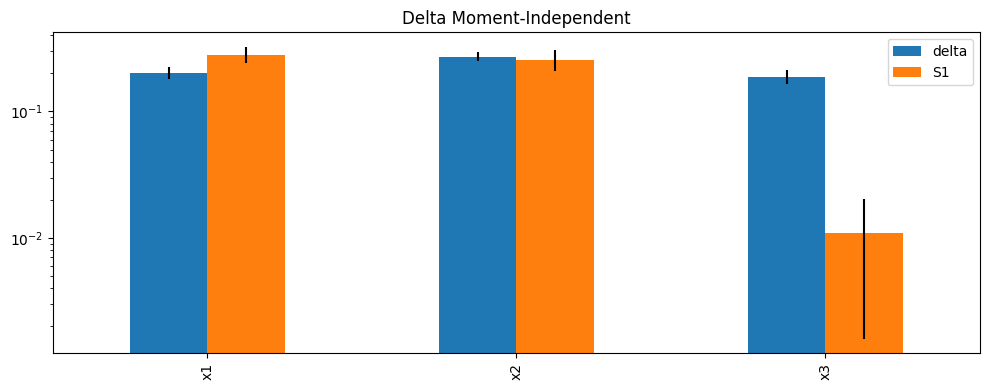

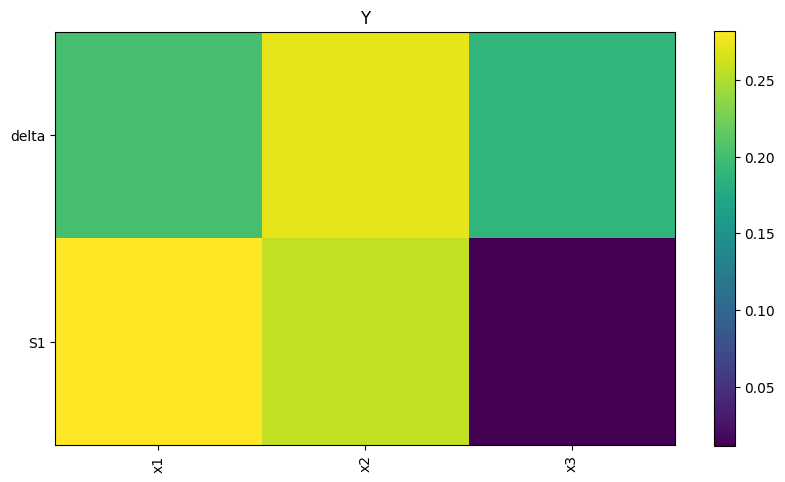

In [16]:
# ==== Delta Moment-Independent ~ Ishigami ===

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

# TODO ?? any sample
(sp.sample_latin(1000).evaluate(Ishigami.evaluate).analyze_delta())
print(sp)

df_delta = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
axes.set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="Delta Moment-Independent")
plt.tight_layout()

sp.heatmap()

In [61]:
# ==== Delta Moment-Independent ~ Sobol G-Function ===
from SALib.test_functions import Sobol_G

def delta_sobol_g(n, a_arr=[], delta_arr=[]):
    names_arr = []
    for i in range(n):
        param = 'x' + str(i)
        names_arr.append(param)

    if len(a_arr) == 0 and len(delta_arr) == 0:
        for i in range(n):
            a_arr.append(9)
            delta_arr.append(1)

    # define model inputs 
    sp = ProblemSpec({
        'num_vars': n,
        'names': names_arr,
        'bounds': [[0,1]] * n 
    })

    (sp.sample_latin(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_delta())    

    print(sp)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    axes.set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 4)
    plt.title(label=f"Delta Moment-Independent - Sobol G Function - {n} inputs")
    plt.tight_layout()
    sp.heatmap(title="Delta Moment-Independent")

# delta_sobol_g(40)

# DGSM

Derivative-based Global Sensitivity Measure (DGSM)
* Averaging local derivatives 

* vi: first order
* dgsm: total order

Samples:
	3 parameters: ['x1', 'x2', 'x3']
	4000 samples
Outputs:
	1 outputs: ['Y']
	4000 evaluations
Analysis:
           vi     vi_std      dgsm  dgsm_conf
x1   7.733127  16.435227  2.243290   1.032354
x2  24.375341  17.356755  7.071002   1.109163
x3  11.348873  24.401096  3.292176   1.444961



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


<Axes: title={'center': 'Y'}>

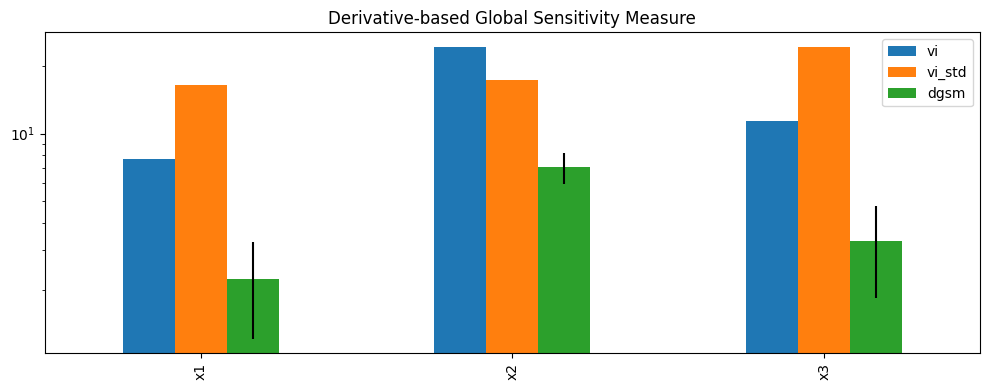

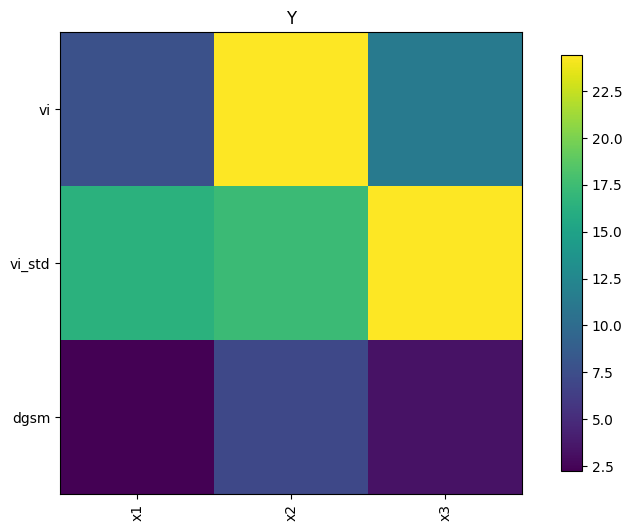

In [19]:
# ==== Derivative-based Global Sensitivity Measure (DGSM) ~ Ishigami ===

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

(sp.sample_finite_diff(1000).evaluate(Ishigami.evaluate).analyze_dgsm())
print(sp)

df_delta = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
axes.set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="Derivative-based Global Sensitivity Measure")
plt.tight_layout()

sp.heatmap()

In [64]:
# ==== Derivative-based Global Sensitivity Measure (DGSM) ~ Sobol G-Function ===
from SALib.test_functions import Sobol_G

def dgsm_sobol_g(n, a_arr=[], delta_arr=[]):
    names_arr = []
    for i in range(n):
        param = 'x' + str(i)
        names_arr.append(param)

    if len(a_arr) == 0 and len(delta_arr) == 0:
        for i in range(n):
            a_arr.append(9)
            delta_arr.append(1)

    # define model inputs 
    sp = ProblemSpec({
        'num_vars': n,
        'names': names_arr,
        'bounds': [[0,1]] * n 
    })

    (sp.sample_finite_diff(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_dgsm())    

    print(sp)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    axes.set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 4)
    plt.title(label=f"DGSM - Sobol G Function - {n} inputs")
    plt.tight_layout()
    sp.heatmap(title="DGSM")

# dgsm_sobol_g(40)

# Fractional Factorial

* ME: main effect
* IE: interaction effect - interactions between input variables

Samples:
	4 parameters: ['x1', 'x2', 'x3', 'dummy_0']
	8 samples
Outputs:
	1 outputs: ['Y']
	8 evaluations
Analysis:
                   ME
x1      -2.221468e-12
x2       0.000000e+00
x3       0.000000e+00
dummy_0  0.000000e+00
                IE
(x1, x2)       0.0
(x1, x3)       0.0
(x2, x3)       0.0
(x1, dummy_0)  0.0
(x2, dummy_0)  0.0
(x3, dummy_0)  0.0



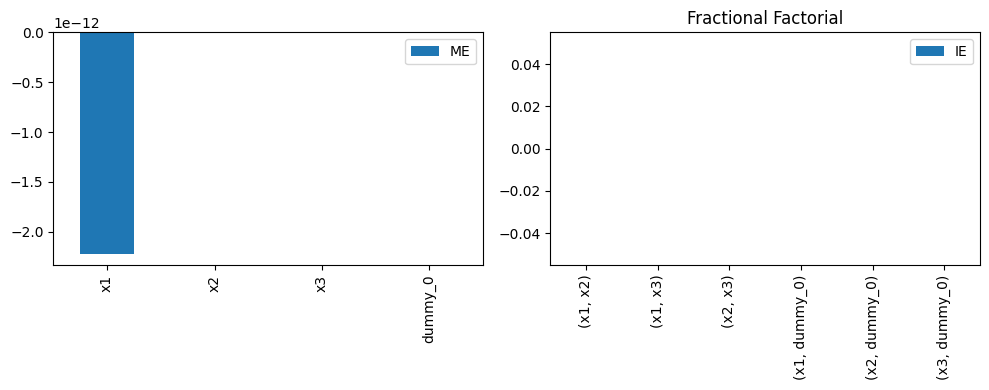

In [15]:
# ==== Fractional Factorial ~ Ishigami ===

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

(sp.sample_ff(1000).evaluate(Ishigami.evaluate).analyze_ff(second_order=True))
print(sp)

df_ff = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="Fractional Factorial")
plt.tight_layout()


Samples:
	64 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63']
	128 samples
Outputs:
	1 outputs: ['Y']
	128 evaluations
Analysis:
               ME
x0   3.552714e-15
x1   0.000000e+00
x2   0.000000e+00
x3   0.000000e+00
x4   0.000000e+00
..            ...
x59  0.000000e+00
x60  0.000000e+00
x61  0.000000e+00
x62  0.000000e+00
x63  0.000000e+00

[64 rows x 1 columns]
             IE
(x0, x1)    0.0
(x0, x2)    0.0
(x1, x2)    0.0
(x0, x3)    0.0
(x1, x3)    0.0
...         ...
(x58, x63)  0.0
(x59, x63)  0.0
(x60, x63)  0.0
(x61, x63)  0.0
(x62, x63)  0.0

[2016 rows x 1 columns]



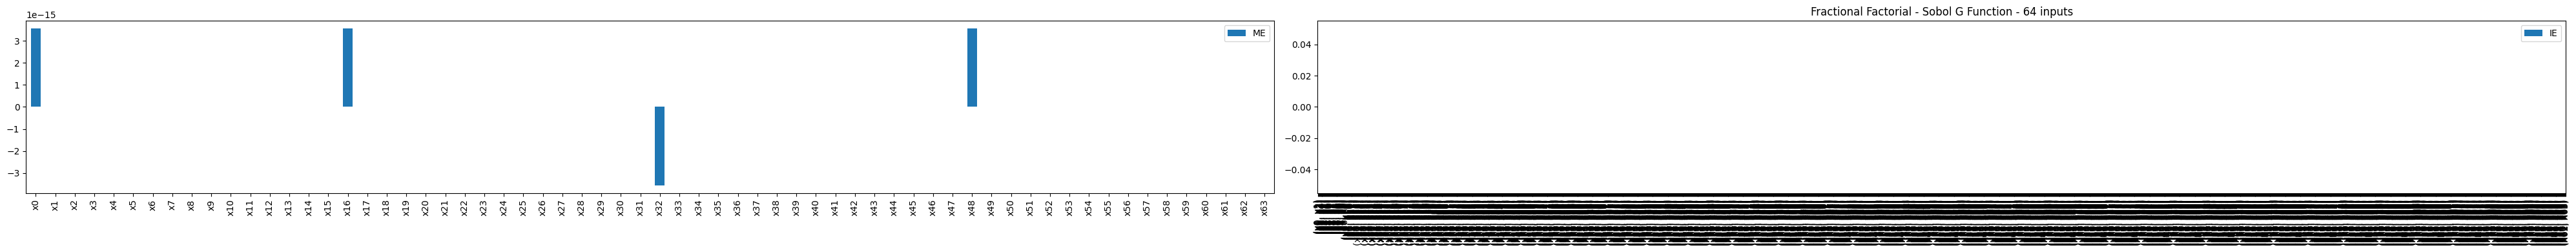

In [71]:
# ==== Derivative-based Global Sensitivity Measure (DGSM) ~ Sobol G-Function ===
from SALib.test_functions import Sobol_G

def ff_sobol_g(n, a_arr=[], delta_arr=[]):
    names_arr = []
    for i in range(n):
        param = 'x' + str(i)
        names_arr.append(param)

    if len(a_arr) == 0 and len(delta_arr) == 0:
        for i in range(n):
            a_arr.append(9)
            delta_arr.append(1)

    # define model inputs 
    sp = ProblemSpec({
        'num_vars': n,
        'names': names_arr,
        'bounds': [[0,1]] * n 
    })

    (sp.sample_ff(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_ff(second_order=True))    

    print(sp)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 4)
    plt.title(label=f"Fractional Factorial - Sobol G Function - {n} inputs")
    plt.tight_layout()

ff_sobol_g(64)

# PAWN

* Moment-independent 

*How does it work?*
* Looks at distribution of model outputs insted of variation 
* Characterizes outputs with cumulative distribution function (CDF)
* "Characterizes the relationship between inputs and outputs by quantifying the variation in the output distributions after conditioning an input"

*Purpose*
* Used for low sample sizes 
* Used for factor ranking and screening

---
* CV: coefficient of variation - indicates level of variability
    * closer to zero - lower variation  


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	3 parameters: ['x1', 'x2', 'x3']
	1000 samples
Outputs:
	1 outputs: ['Y']
	1000 evaluations
Analysis:
    minimum      mean   median  maximum        CV
x1    0.163  0.241000  0.25800    0.347  0.243904
x2    0.210  0.365298  0.40849    0.494  0.293314
x3    0.078  0.119032  0.10400    0.227  0.348349



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


<Axes: title={'center': 'Y'}>

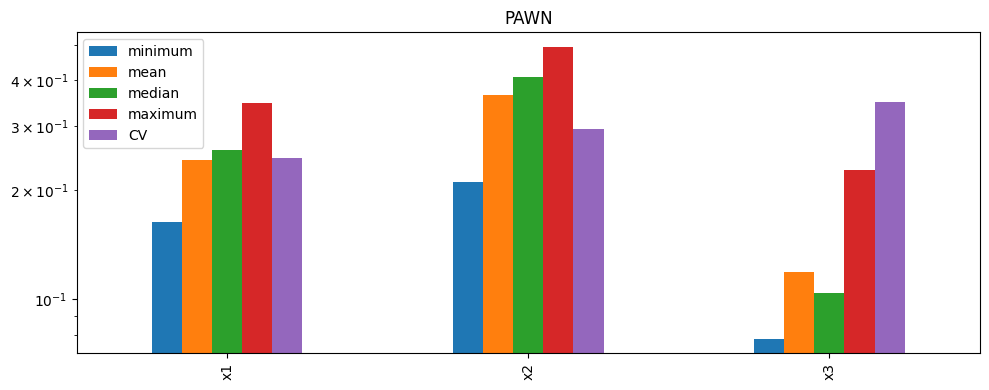

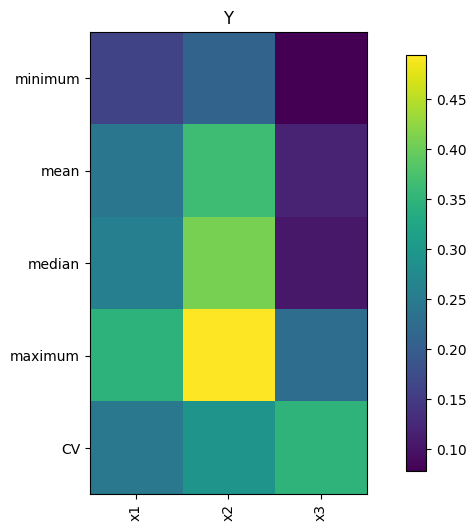

In [36]:
# ==== PAWN ~ Ishigami ===
# explores distribution of model outputs instead of variation 
# characterizes by cumulative distribution function instead of probability distribution function

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

# any sample
(sp.sample_latin(1000).evaluate(Ishigami.evaluate).analyze_pawn())
print(sp)

df_delta = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
axes.set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="PAWN")
plt.tight_layout()

sp.heatmap()

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
      minimum      mean    median   maximum        CV
x0   0.054917  0.089719  0.078326  0.134785  0.323229
x1   0.058038  0.107082  0.090753  0.185777  0.403856
x2   0.049833  0.096250  0.103152  0.151042  0.359138
x3   0.064223  0.101154  0.090361  0.164867  0.310793
x4   0.052619  0.120845  0.136183  0.179081  0.348684
x5   0.050954  0.094024  0.103647  0.131409  0.273012
x6   0.064093  0.126008  0.131501  0.185006  0.305833
x7   0.056091  0.107836  0.096134  0.200655  0.385779
x8   0.053929  0.112197  0.096159  0.242264  0.501323
x9   0.065928  0.095292  0.097825  0.139380  0.262716
x10  0.078604  0.109824  0.108207  0.1504

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


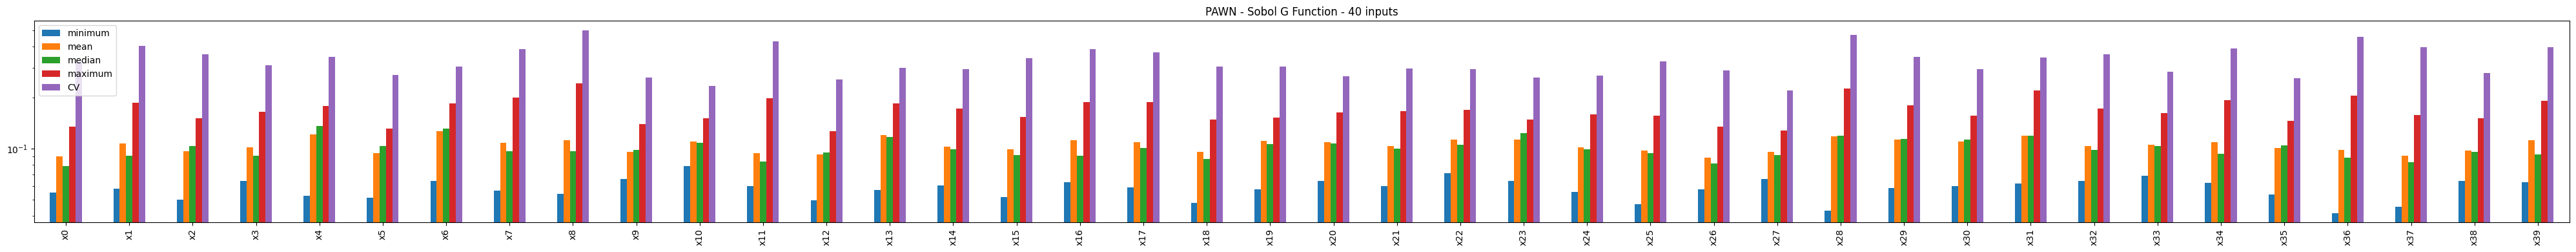

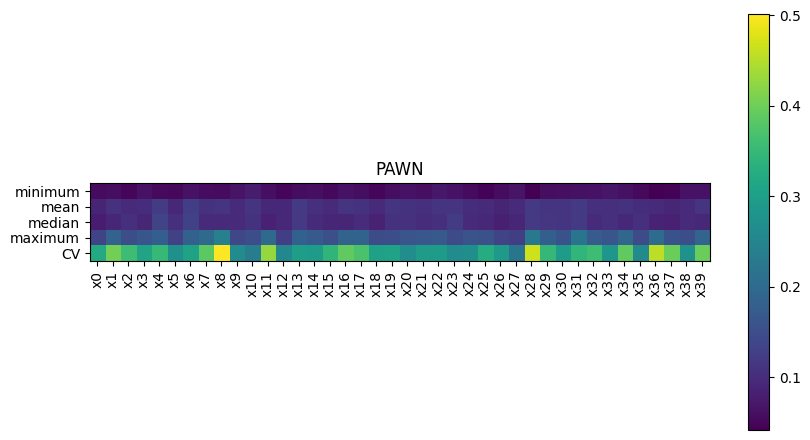

In [73]:
# ==== PAWN ~ Sobol G-Function ===
from SALib.test_functions import Sobol_G

def pawn_sobol_g(n, a_arr=[], delta_arr=[]):
    names_arr = []
    for i in range(n):
        param = 'x' + str(i)
        names_arr.append(param)

    if len(a_arr) == 0 and len(delta_arr) == 0:
        for i in range(n):
            a_arr.append(9)
            delta_arr.append(1)

    # define model inputs 
    sp = ProblemSpec({
        'num_vars': n,
        'names': names_arr,
        'bounds': [[0,1]] * n 
    })

    (sp.sample_latin(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_pawn())    

    print(sp)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    axes.set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 4)
    plt.title(label=f"PAWN - Sobol G Function - {n} inputs")
    plt.tight_layout()
    sp.heatmap(title="PAWN")

# pawn_sobol_g(40)

# High Dimensional

* Substitute modeling approach

"Creates map of relationship between sets of high dimensional inputs and output system variables"

*When to use*
* High computational cost for other methods like Sobol

*Returns (SALib)* \
Si – Sa : Uncorrelated contribution of a term

Sa_conf : Confidence interval of Sa

Sb : Correlated contribution of a term

Sb_conf : Confidence interval of Sb

S
Total contribution of a particular term
Sum of Sa and Sb, representing first/second/third order sensitivity indices

S_conf : Confidence interval of S

ST : Total contribution of a particular dimension/parameter

ST_conf : Confidence interval of ST

select : Number of selection (F-Test)

Em: Emulator result set
* C1: First order coefficient C2: Second order coefficient C3: Third Order coefficient

In [75]:
# ==== High-Dimensional ~ Ishigami ===

# define model inputs 
sp = ProblemSpec({
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359]]*3
})

# any sample
(sp.sample_saltelli(2048).evaluate(Ishigami.evaluate).analyze_hdmr())
print(sp)

df_delta = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
"""
axes = sp.plot() #  returns matplotlib axes object
axes.set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="Derivative-based Global Sensitivity Measure")
plt.tight_layout()
"""
X = sp.samples
sp.emulate(X) # what should this do????

Samples:
	3 parameters: ['x1', 'x2', 'x3', 'x1/x2', 'x1/x3', 'x2/x3']
	16384 samples
Outputs:
	1 outputs: ['Y']
	16384 evaluations
Analysis:
             Sa   Sa_conf        Sb   Sb_conf         S    S_conf        ST  \
x1     0.310536  0.009383  0.000931  0.005268  0.311243  0.008661  0.552888   
x2     0.346983  0.008832  0.001026  0.006874  0.347693  0.008930  0.349120   
x3     0.000177  0.000297  0.000091  0.000209  0.000269  0.000480  0.242562   
x1/x2  0.000342  0.000258  0.000227  0.000181  0.000390  0.000258       NaN   
x1/x3  0.240921  0.005233  0.001033  0.003196  0.241256  0.004272       NaN   
x2/x3  0.000768  0.000476  0.000848  0.000531  0.001037  0.000633       NaN   

        ST_conf  
x1     0.009951  
x2     0.009057  
x3     0.004173  
x1/x2       NaN  
x1/x3       NaN  
x2/x3       NaN  



In [80]:
# ==== High-Dimensional ~ Sobol G-Function ===
from SALib.test_functions import Sobol_G

def hdmr_sobol_g(n, a_arr=[], delta_arr=[]):
    names_arr = []
    for i in range(n):
        param = 'x' + str(i)
        names_arr.append(param)

    if len(a_arr) == 0 and len(delta_arr) == 0:
        for i in range(n):
            a_arr.append(9)
            delta_arr.append(1)

    # define model inputs 
    sp = ProblemSpec({
        'num_vars': n,
        'names': names_arr,
        'bounds': [[0,1]] * n 
    })

    (sp.sample_saltelli(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_hdmr())    

    print(sp)

    # === Plotting results ===
    """
    axes = sp.plot() #  returns matplotlib axes object
    axes.set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 4)
    """

    X = sp.samples
    sp.emulate(X)

# hdmr_sobol_g(5)

Samples:
	5 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x0/x1', 'x0/x2', 'x0/x3', 'x0/x4', 'x1/x2', 'x1/x3', 'x1/x4', 'x2/x3', 'x2/x4', 'x3/x4']
	12288 samples
Outputs:
	1 outputs: ['Y']
	12288 evaluations
Analysis:
             Sa   Sa_conf        Sb   Sb_conf         S    S_conf        ST  \
x0     0.198007  0.005673 -0.001733  0.005484  0.195806  0.003919  0.199479   
x1     0.197569  0.006325  0.000366  0.007379  0.197485  0.007296  0.201156   
x2     0.197645  0.005259 -0.000786  0.005458  0.196633  0.004302  0.200275   
x3     0.197270  0.005528 -0.000417  0.004808  0.196518  0.004635  0.200046   
x4     0.197376  0.004866 -0.000095  0.007019  0.197031  0.004789  0.200375   
x0/x1  0.000659  0.000114  0.000310  0.000631  0.000918  0.000632       NaN   
x0/x2  0.000716  0.000124  0.000227  0.000589  0.000914  0.000573       NaN   
x0/x3  0.000729  0.000127  0.000278  0.000543  0.000963  0.000545       NaN   
x0/x4  0.000728  0.000124  0.000180  0.000626  0.000877  0.000644       N

# Regional Sensitivity Analysis

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	3 parameters: ['x1', 'x2', 'x3']
	1000 samples
Outputs:
	1 outputs: ['Y']
	1000 evaluations
Analysis:
            x1        x2        x3
0.00  5.138336  0.227218  3.155559
0.05  4.967001  0.418085  0.382395
0.10  4.770582  0.467546  0.679746
0.15  0.697532  0.702334  0.318252
0.20  0.329100  0.492658  0.884723
0.25  0.029321  0.228148  0.087092
0.30  0.508433  0.392108  0.133433
0.35  0.220275  0.094877  0.076841
0.40  0.163081  0.125639  0.098315
0.45  0.160308  0.118138  0.346205
0.50  0.115881  0.130915  0.335153
0.55  0.033944  0.190612  0.250047
0.60  0.064881  0.202999  0.051439
0.65  0.508506  0.244767  0.160092
0.70  0.267957  0.252774  0.285239
0.75  0.218344  0.254353  0.066978
0.80  2.556974  0.299435  0.406715
0.85  3.930062  0.502292  0.176401
0.90  5.216056  0.277782  0.829311
0.95  5.431153  0.330311  2.321856



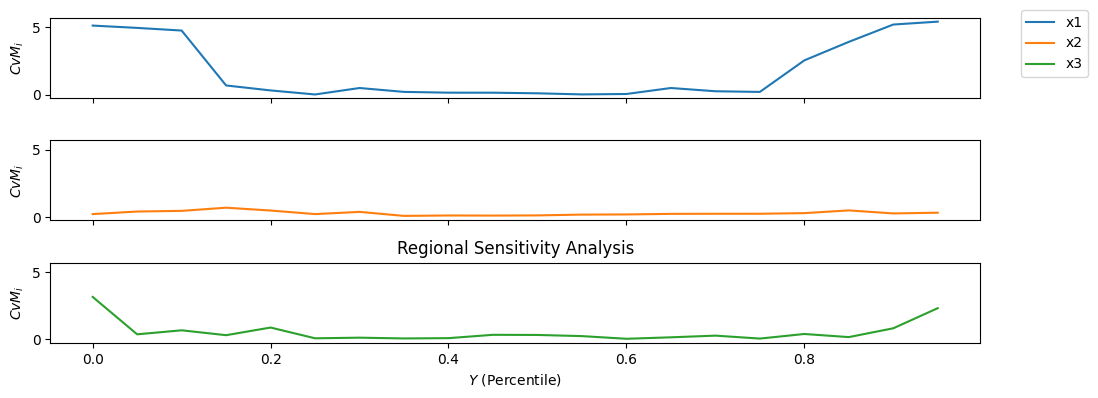

In [34]:
# ==== Regional Sensitivity Analysis ~ Ishigami ===
# explores distribution of model outputs instead of variation 
# characterizes by cumulative distribution function instead of probability distribution function

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

# TODO ?? any sample
(sp.sample_latin(1000).evaluate(Ishigami.evaluate).analyze_rsa())
print(sp)

df_delta = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="Regional Sensitivity Analysis")
plt.tight_layout()

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
            x0        x1        x2        x3        x4        x5        x6  \
0.00  0.128642  0.208776  0.130326  0.415118  0.130830  0.269464  0.458826   
0.05  0.137790  0.290182  0.074280  0.270735  0.098768  0.194658  0.411481   
0.10  0.485495  0.202362  0.239997  0.071230  0.098026  0.348519  0.537664   
0.15  0.118026  0.171283  0.322246  0.316616  0.050535  0.230160  0.320213   
0.20  0.070692  0.129633  0.165288  0.075619  0.079135  0.102859  0.242168   
0.25  0.050829  0.115730  0.235951  0.048264  0.188058  0.116772  0.497630   
0.30  0.351877  0.210756  0.144335  0.050505  0.230400  0.393723  0.209384   
0.35  0.084

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/analyze/rsa.py:238: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  fig.tight_layout()
/tmp/ipykernel_31531/374258082.py:33: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


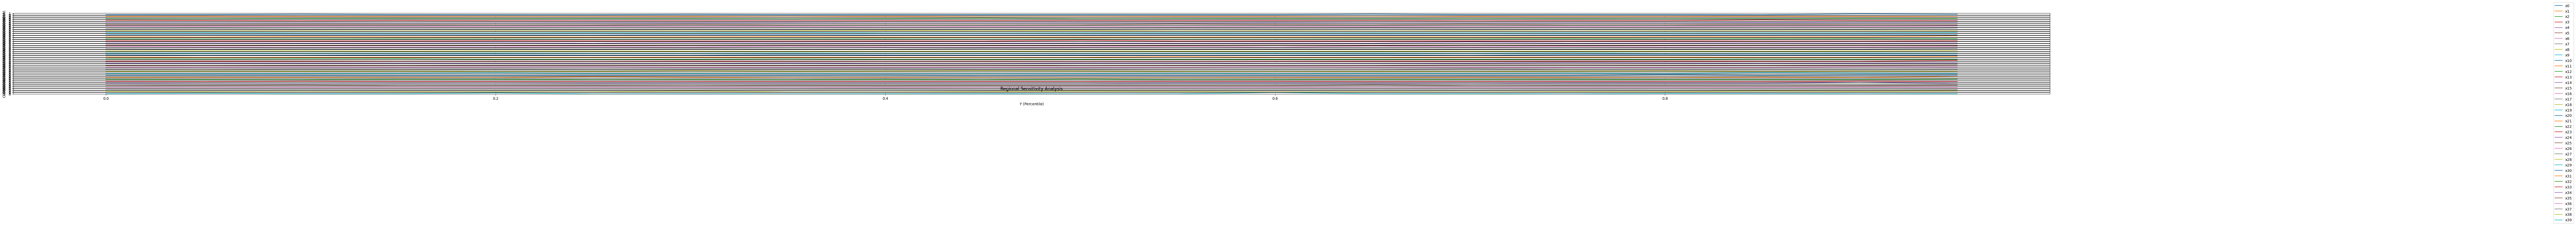

In [84]:
# ==== RSA ~ Sobol G-Function ===
from SALib.test_functions import Sobol_G

def rsa_sobol_g(n, a_arr=[], delta_arr=[]):
    names_arr = []
    for i in range(n):
        param = 'x' + str(i)
        names_arr.append(param)

    if len(a_arr) == 0 and len(delta_arr) == 0:
        for i in range(n):
            a_arr.append(9)
            delta_arr.append(1)

    # define model inputs 
    sp = ProblemSpec({
        'num_vars': n,
        'names': names_arr,
        'bounds': [[0,1]] * n 
    })

    (sp.sample_latin(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_rsa())    

    print(sp)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    fig = plt.gcf() # get current figure
    fig.set_size_inches(100, 4)
    plt.title(label="Regional Sensitivity Analysis")
    plt.tight_layout()

rsa_sobol_g(40)

# Discrepancy

Discrepancy: "deviation of the distribution of points in a multi-dimensional space from the uniform distribution"



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	3 parameters: ['x1', 'x2', 'x3']
	1000 samples
Outputs:
	1 outputs: ['Y']
	1000 evaluations
Analysis:
    s_discrepancy
x1       0.334432
x2       0.333050
x3       0.332518



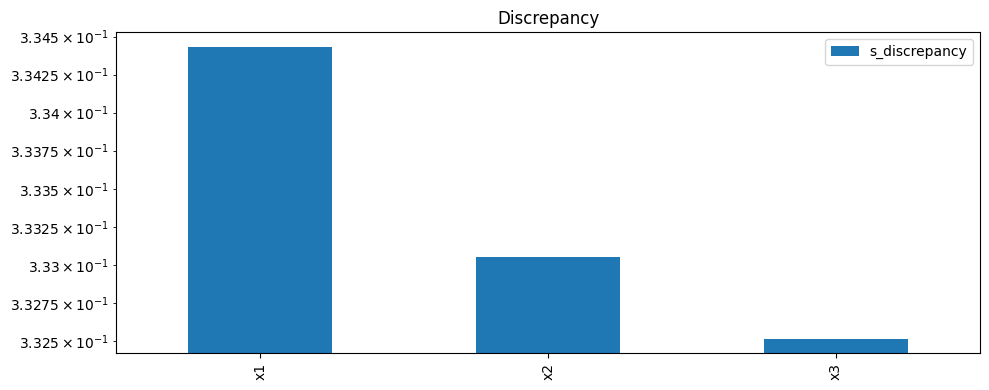

In [33]:
# ==== Discrepancy ~ Ishigami ===
# explores distribution of model outputs instead of variation 
# characterizes by cumulative distribution function instead of probability distribution function

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

# any sample
(sp.sample_latin(1000).evaluate(Ishigami.evaluate).analyze_discrepancy())
print(sp)

df_delta = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
axes.set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="Discrepancy")
plt.tight_layout()

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
     s_discrepancy
x0        0.025004
x1        0.025007
x2        0.024998
x3        0.024991
x4        0.024992
x5        0.025015
x6        0.025002
x7        0.024990
x8        0.024996
x9        0.024994
x10       0.025004
x11       0.024994
x12       0.025005
x13       0.024996
x14       0.024999
x15       0.024997
x16       0.025010
x17       0.024997
x18       0.025000
x19       0.025000
x20       0.024994
x21       0.025006
x22       0.024997
x23       0.024994
x24       0.024987
x25       0.025004
x26       0.024985
x27       0.025003
x28       0.025019
x29       0.025017
x30       0.025000
x31       0.024995
x32     

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


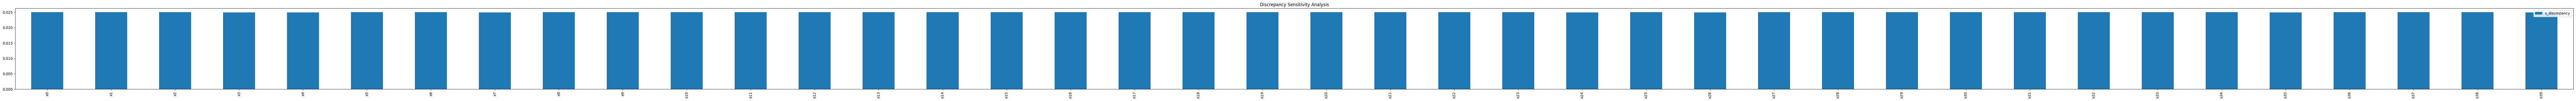

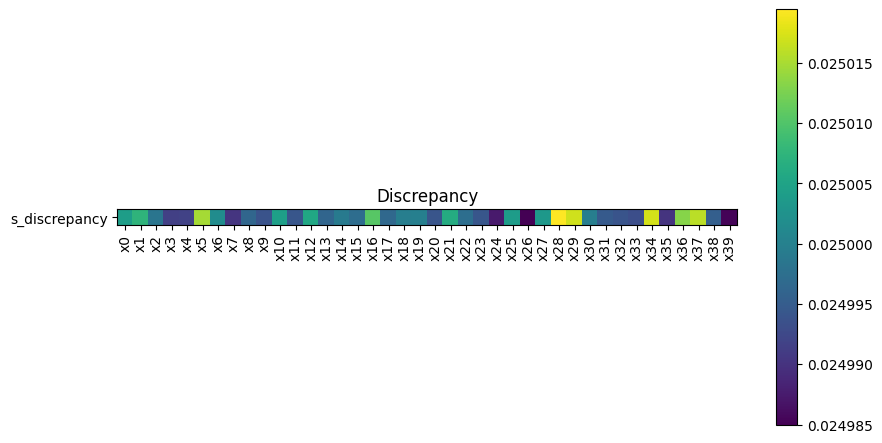

In [86]:
# ==== Discrepancy ~ Sobol G-Function ===
from SALib.test_functions import Sobol_G

def discrepancy_sobol_g(n, a_arr=[], delta_arr=[]):
    names_arr = []
    for i in range(n):
        param = 'x' + str(i)
        names_arr.append(param)

    if len(a_arr) == 0 and len(delta_arr) == 0:
        for i in range(n):
            a_arr.append(9)
            delta_arr.append(1)

    # define model inputs 
    sp = ProblemSpec({
        'num_vars': n,
        'names': names_arr,
        'bounds': [[0,1]] * n 
    })

    (sp.sample_latin(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_discrepancy())    

    print(sp)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    fig = plt.gcf() # get current figure
    fig.set_size_inches(100, 4)
    plt.title(label="Discrepancy Sensitivity Analysis")
    plt.tight_layout()
    sp.heatmap(title="Discrepancy")

# discrepancy_sobol_g(40)

# Ishigami Function

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	3 parameters: ['x1', 'x2', 'x3']
	4000 samples
Outputs:
	1 outputs: ['Y']
	4000 evaluations
Analysis:
          mu   mu_star     sigma  mu_star_conf
x1  7.804035  7.804035  6.251123  3.922187e-01
x2 -0.409500  7.875000  7.868281  3.715515e-15
x3 -0.149971  6.223801  8.822577  3.785624e-01

Samples:
	3 parameters: ['x1', 'x2', 'x3']
	4000 samples
Outputs:
	1 outputs: ['Y']
	4000 evaluations
Analysis:
          mu   mu_star     sigma  mu_star_conf
x1  7.554083  7.554083  6.250122  3.883830e-01
x2  0.204750  7.875000  7.876277  2.468069e-15
x3 -0.862334  6.111323  8.701087  3.797083e-01

Samples:
	3 parameters: ['x1', 'x2', 'x3']
	4000 samples
Outputs:
	1 outputs: ['Y']
	4000 evaluations
Analysis:
          mu   mu_star     sigma  mu_star_conf
x1  7.504093  7.504093  6.248721  3.890441e-01
x2  0.157500  7.875000  7.877365  2.353802e-15
x3  0.099981  6.223801  8.823286  3.810183e-01



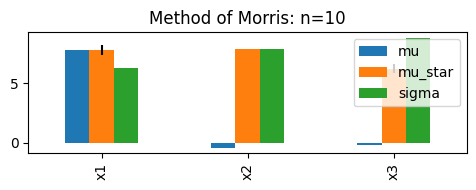

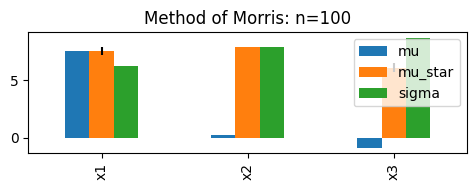

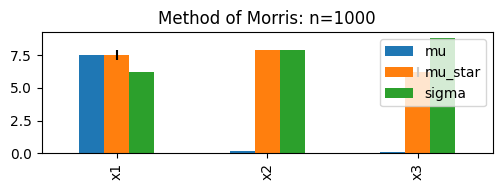

In [36]:
morris(10)
morris(100)
morris(1000)

# Sobol G Function

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	43008 samples
Outputs:
	1 outputs: ['Y']
	43008 evaluations
Analysis:
           ST   ST_conf
x0   0.027432  0.003247
x1   0.027378  0.003578
x2   0.027315  0.003678
x3   0.027831  0.003741
x4   0.027839  0.003051
x5   0.027438  0.003280
x6   0.027025  0.003115
x7   0.027517  0.003199
x8   0.028046  0.003507
x9   0.028536  0.003669
x10  0.026624  0.003325
x11  0.027137  0.003212
x12  0.029041  0.003590
x13  0.027661  0.002995
x14  0.027018  0.003267
x15  0.026481  0.003039
x16  0.027162  0.003725
x17  0.026873  0.003224
x18  0.027618  0.003085
x19  0.026732  0.003378
x20  0.027296  0.003050
x21  0.028052  0.003305
x22  0.028458  0.003960
x23  0.028215  0.003549
x24  0.028289  0.003739
x25  0.02

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	41984 samples
Outputs:
	1 outputs: ['Y']
	41984 evaluations
Analysis:
           mu   mu_star     sigma  mu_star_conf
x0  -0.016352  0.718590  0.776156      0.017711
x1   0.007424  0.707488  0.765461      0.018326
x2  -0.013506  0.710694  0.763637      0.016255
x3  -0.031949  0.713606  0.772294      0.016239
x4   0.004535  0.705557  0.762148      0.016328
x5   0.046008  0.717928  0.772259      0.018140
x6   0.019400  0.719256  0.780928      0.017073
x7  -0.041287  0.712124  0.770125      0.016301
x8   0.023398  0.718794  0.781615      0.017357
x9  -0.012769  0.703956  0.761293      0.019621
x10  0.018418  0.700089  0.760228      0.016988
x11 -0.015679  0.734414  0.795896      0.017821
x12  0.04

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
           S1   S1_conf
x0   0.014913  0.031450
x1   0.016002  0.032431
x2   0.022449  0.037058
x3   0.021272  0.032824
x4   0.029549  0.036258
x5   0.034803  0.042541
x6   0.033468  0.044720
x7   0.026844  0.036005
x8   0.019087  0.035859
x9   0.011758  0.036431
x10  0.027617  0.037672
x11  0.016464  0.034721
x12  0.031957  0.041380
x13  0.024102  0.031293
x14  0.036806  0.040870
x15  0.026041  0.034529
x16  0.019166  0.033642
x17  0.005808  0.032388
x18  0.015178  0.030753
x19  0.042261  0.036746
x20  0.030600  0.039867
x21  0.021236  0.038776
x22  0.023554  0.036776
x23  0.027898  0.039876
x24  0.016255  0.037228
x25  0.0227

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
        delta  delta_conf        S1   S1_conf
x0   0.103234    0.019003  0.025364  0.020221
x1   0.112276    0.020066  0.040594  0.014988
x2   0.091204    0.015282  0.036337  0.017670
x3   0.113832    0.018568  0.030606  0.019449
x4   0.049752    0.017102  0.018407  0.017058
x5   0.067994    0.020029  0.038348  0.022660
x6   0.037809    0.018479  0.030596  0.013843
x7   0.075572    0.017587  0.025684  0.021110
x8   0.095166    0.020242  0.046042  0.020993
x9   0.099618    0.018862  0.020577  0.021460
x10  0.129501    0.017935  0.046474  0.020828
x11  0.080973    0.016486  0.034147  0.015328
x12  0.054793    0.017806  0.017033  

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
      minimum      mean    median   maximum        CV
x0   0.055319  0.128039  0.108826  0.255802  0.439614
x1   0.042318  0.100915  0.089991  0.183689  0.510526
x2   0.049719  0.120786  0.115368  0.213963  0.333708
x3   0.043699  0.092376  0.090552  0.149261  0.353417
x4   0.045726  0.106780  0.112898  0.176279  0.370234
x5   0.043505  0.095573  0.084948  0.186552  0.446672
x6   0.053634  0.111838  0.101889  0.208850  0.371355
x7   0.055798  0.097128  0.088280  0.136144  0.296878
x8   0.042605  0.103543  0.091414  0.196442  0.450816
x9   0.046952  0.098081  0.092955  0.178290  0.389277
x10  0.056622  0.104414  0.098266  0.1866

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
      minimum      mean    median   maximum        CV
x0   0.069661  0.105397  0.095526  0.180418  0.316791
x1   0.049326  0.103419  0.095990  0.194374  0.424174
x2   0.035654  0.086804  0.094004  0.129342  0.307326
x3   0.053328  0.101145  0.105100  0.141592  0.286015
x4   0.055607  0.117536  0.110136  0.193321  0.385520
x5   0.064434  0.097382  0.090045  0.151061  0.300407
x6   0.049383  0.086897  0.080729  0.131760  0.287795
x7   0.051471  0.095350  0.092266  0.146676  0.280878
x8   0.047622  0.095253  0.104888  0.147710  0.365414
x9   0.035290  0.095913  0.077618  0.183421  0.511510
x10  0.072725  0.120673  0.114208  0.2198

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
     s_discrepancy
x0        0.025008
x1        0.025014
x2        0.024994
x3        0.025009
x4        0.024997
x5        0.024997
x6        0.024990
x7        0.025004
x8        0.024997
x9        0.025001
x10       0.024991
x11       0.024985
x12       0.025010
x13       0.024999
x14       0.025011
x15       0.025011
x16       0.024993
x17       0.025010
x18       0.024999
x19       0.024996
x20       0.024998
x21       0.024998
x22       0.025004
x23       0.025010
x24       0.024987
x25       0.024992
x26       0.025013
x27       0.024999
x28       0.024992
x29       0.024990
x30       0.025007
x31       0.025013
x32     

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


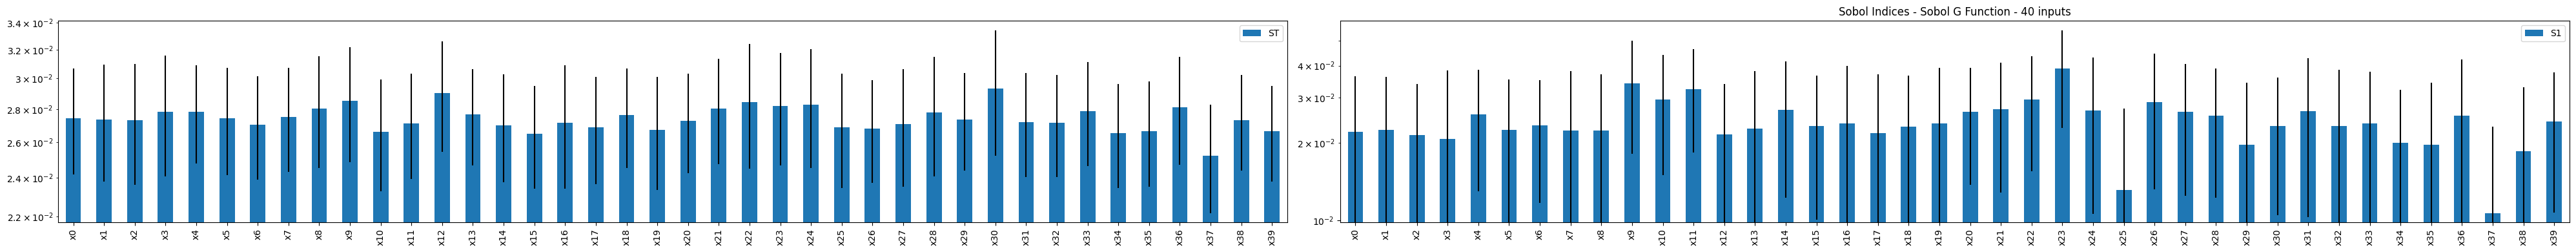

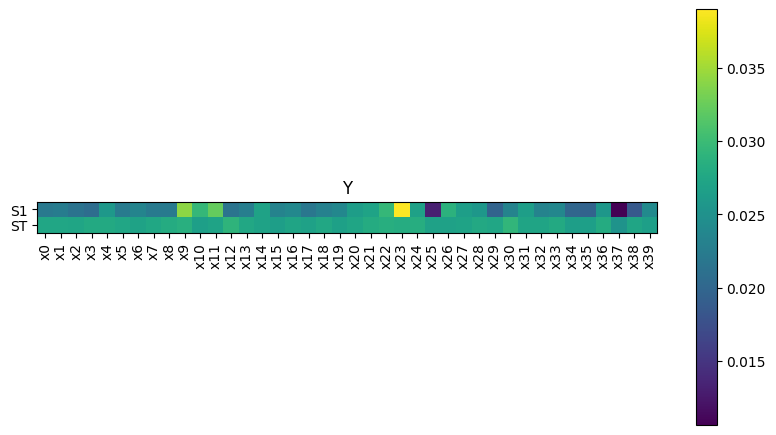

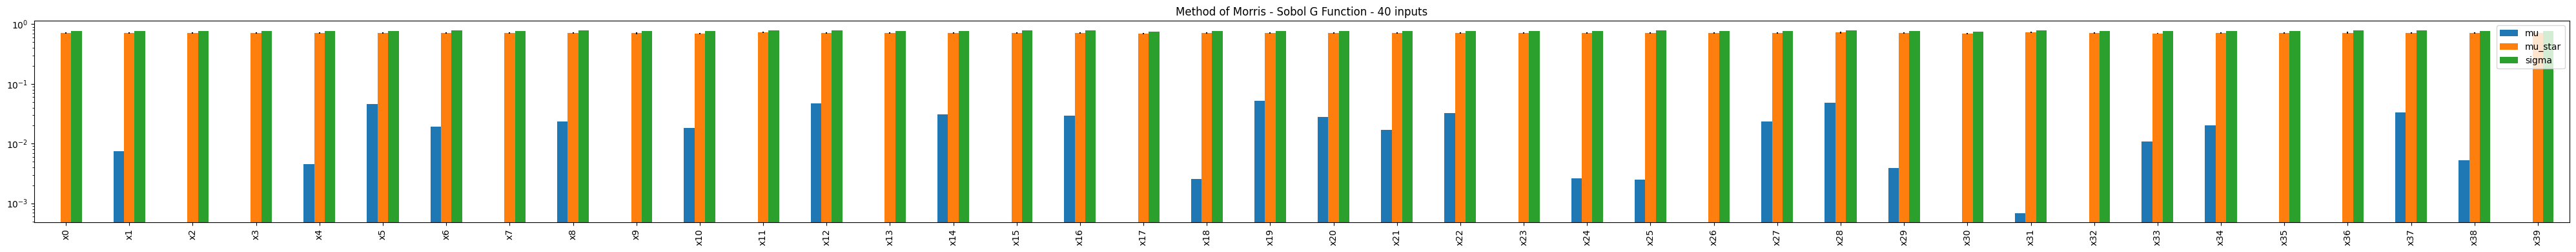

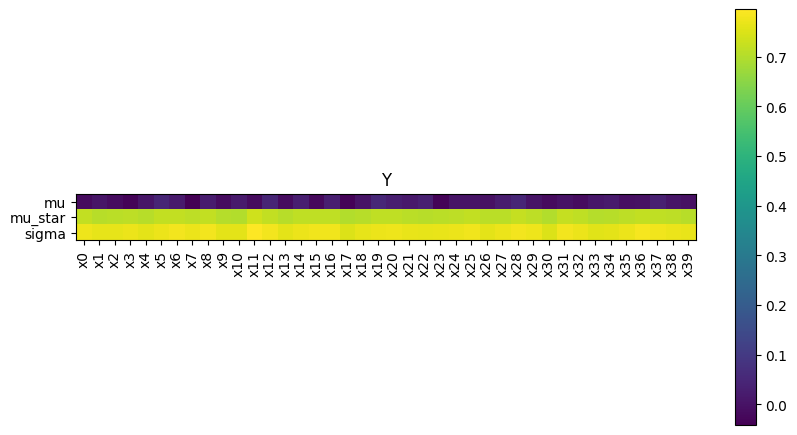

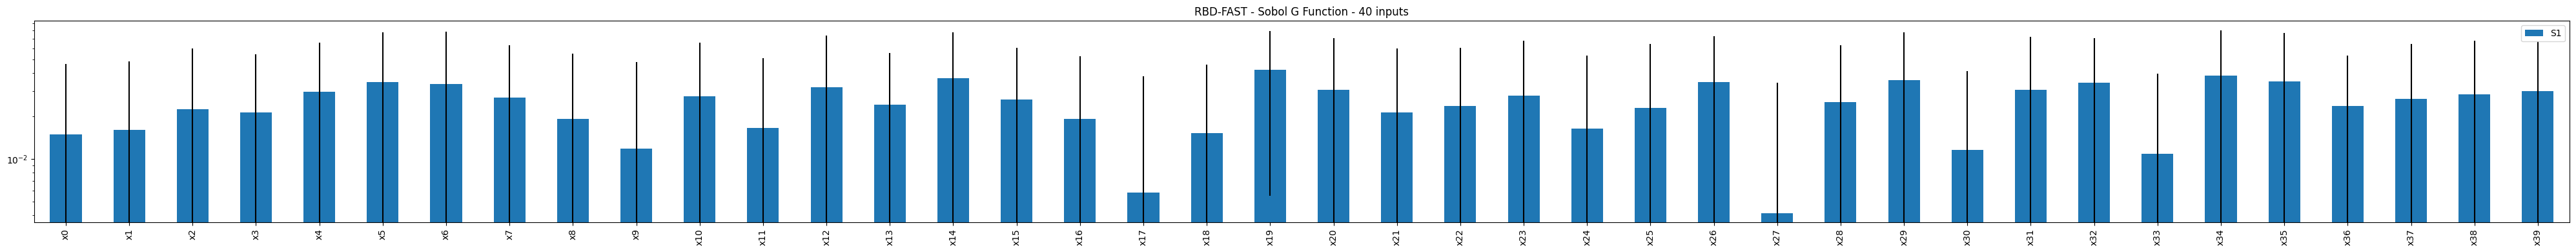

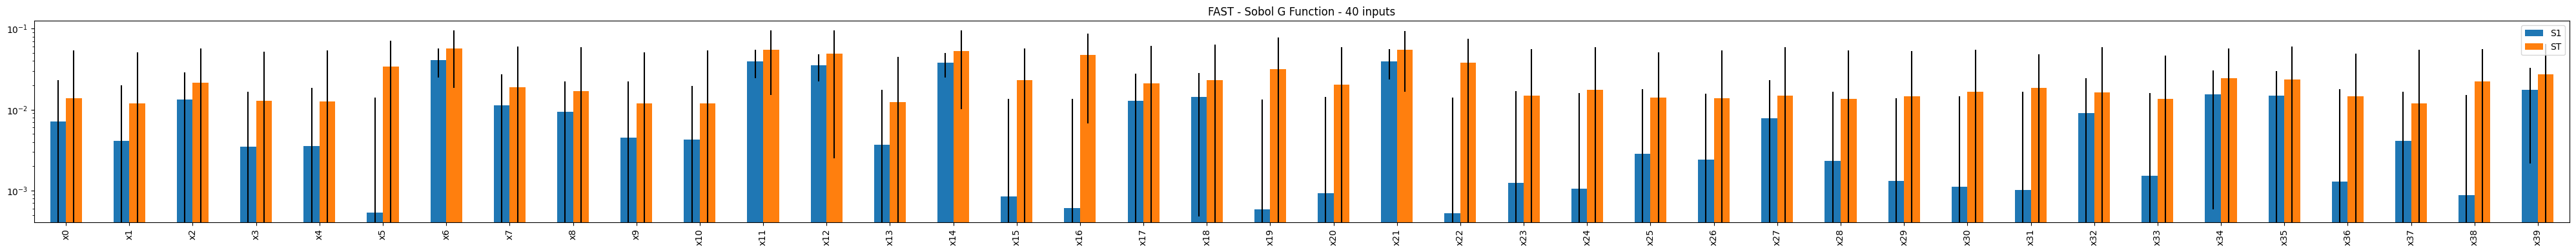

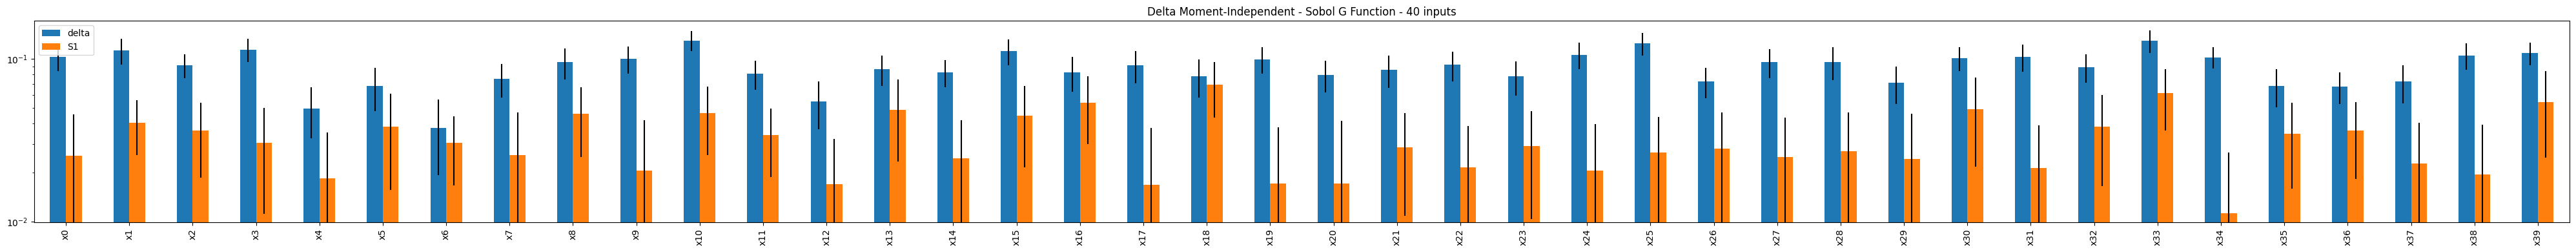

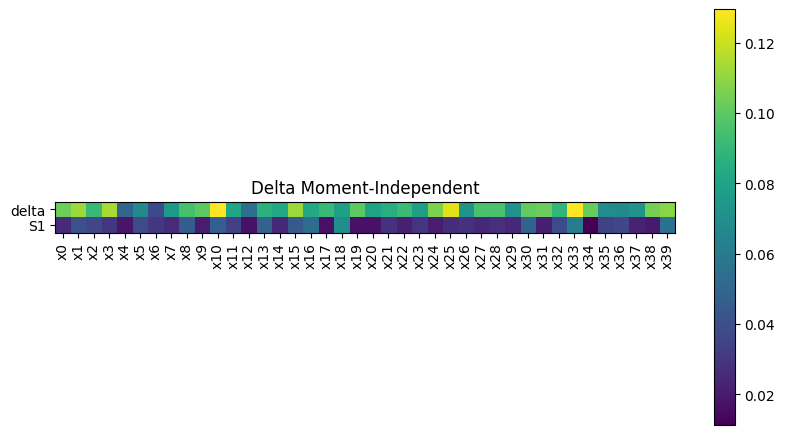

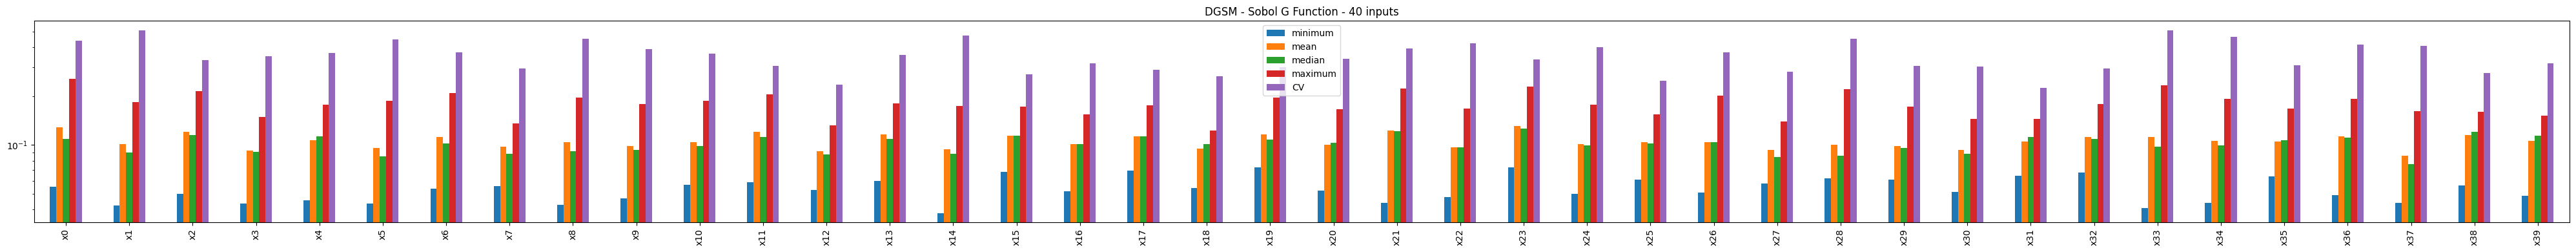

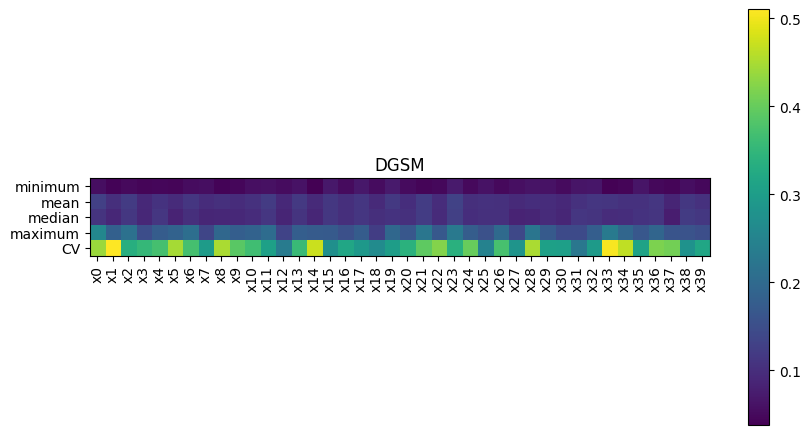

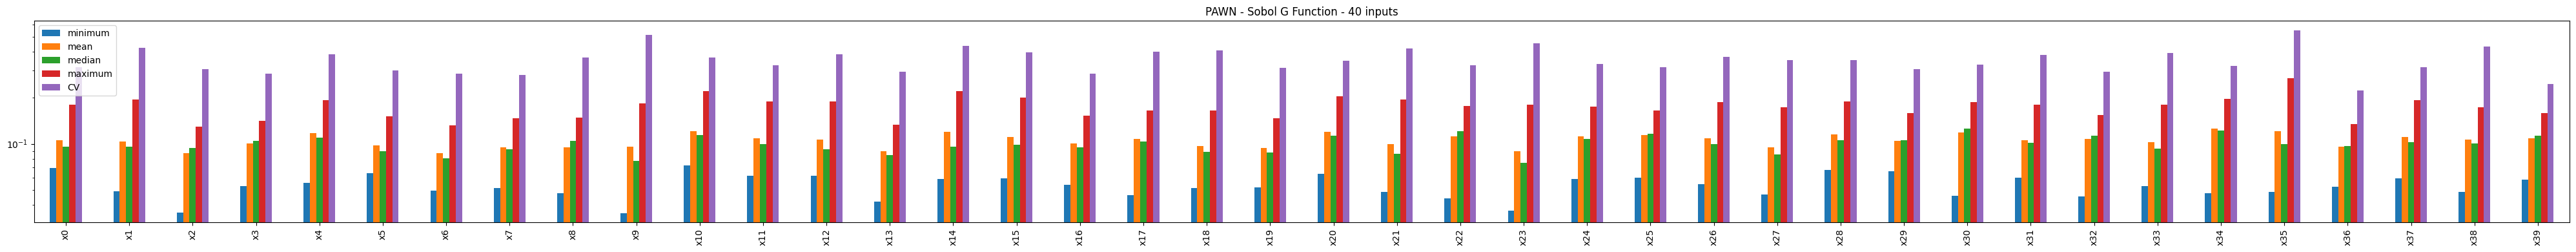

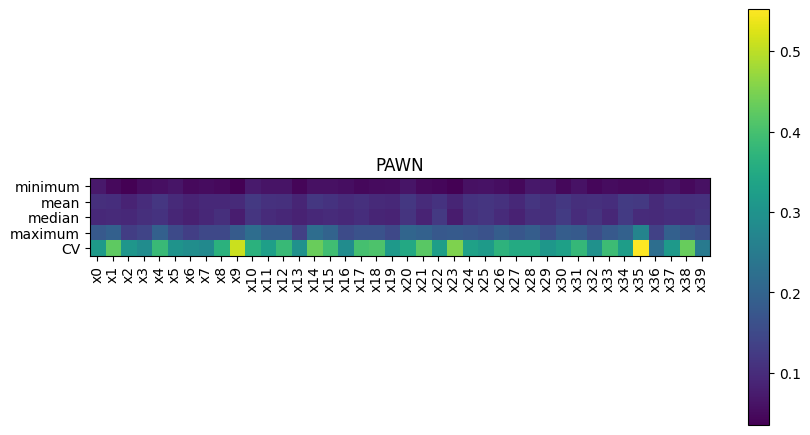

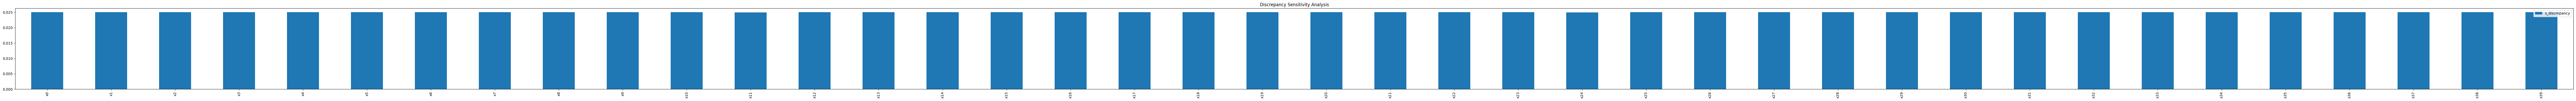

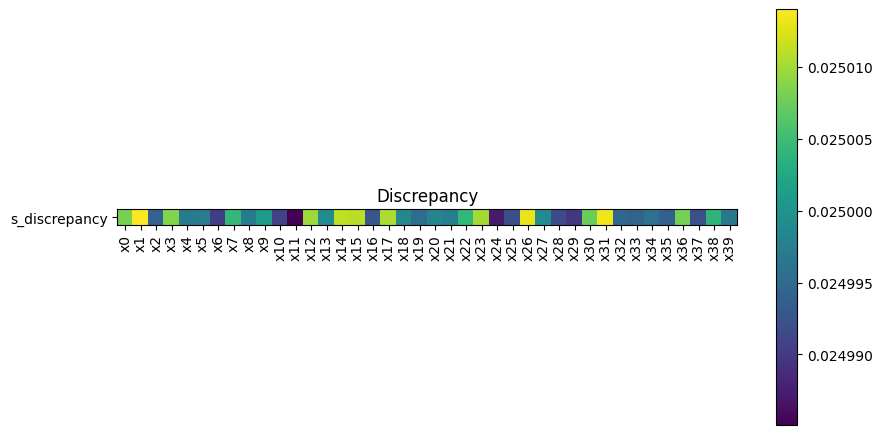

In [87]:
si_sobol_g(40)
morris_sobol_g(40)
rbd_fast_sobol_g(40)
fast_sobol_g(40)
delta_sobol_g(40)
dgsm_sobol_g(40)
# ff_sobol_g(64) # umm this one looked wayyy off
pawn_sobol_g(40)
# hdmr_sobol_g(5) # not a fan of 40 inputs
# rsa_sobol_g(40) # ummmm
discrepancy_sobol_g(40)